Data Analysis and Visualization.
This document is used to explore the data.

Data visualization:
- Plotting the number of elements in columns
- Empty values ​​in rows
- Category distributions
- Checking rare categories

Data analysis:
- Counting frequencies for all labels
- Counting the number of unique values
- Percentage distribution
- Normality test
- Multi-Label Data


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
data_path = "../data/JobLevelData.xlsx"
data = pd.read_excel(data_path)

In [4]:
data.head()

,Title,Column 1,Column 2,Column 3,Column 4
0,Vice President / Director of Systems Engineering,Vice President,NaN,NaN,NaN
1,Systems Engineer; Systems Architect,Manager,Individual Contributor/Staff,NaN,NaN
2,"Executive Director, Global IT Infrastructure /...",Director,Chief Officer,NaN,NaN
3,CTO/Executive Director of Technology Services,Director,Chief Officer,NaN,NaN
4,"Vice President, CIO",Vice President,NaN,NaN,NaN


In [5]:
data["Title"].value_counts()

Title
Vice President / Director of Systems Engineering                                     1
Director, Brand and Content Strategies and Initiatives / Director Brand Marketing    1
Team manager Software Engineer                                                       1
IT Global Director Finance & GBS                                                     1
Head of Managed IT Services                                                          1
                                                                                    ..
Vice President of Global Services                                                    1
Senior Assistant HR Shared Services                                                  1
Chief Delivery Officer                                                               1
Assistant Manager Of Technology                                                      1
Founder and Chief Executive Officer, Kindbody                                        1
Name: count, Length: 2240, dtype: int

In [6]:
# Counting the number of unique values
data['Column 1'].value_counts()
# data['Column 2'].value_counts()
# data['Column 3'].value_counts()
# data['Column 4'].value_counts()

Column 1
Individual Contributor/Staff    1039
Director                         470
Vice President                   403
Manager                          190
Chief Officer                    124
Owner                              4
Name: count, dtype: int64

In [46]:
# Percentage distribution
data['Column 1'].value_counts(normalize=True) * 100
# data['Column 2'].value_counts(normalize=True) * 100
# data['Column 3'].value_counts(normalize=True) * 100
# data['Column 4'].value_counts(normalize=True) * 100

Column 1
Individual Contributor/Staff    46.591928
Director                        21.076233
Vice President                  18.071749
Manager                          8.520179
Chief Officer                    5.560538
Owner                            0.179372
Name: proportion, dtype: float64

In [15]:
data.describe()

,Title,Column 1,Column 2,Column 3,Column 4
count,2240,2230,133,12,11
unique,2240,6,4,2,1
top,Vice President / Director of Systems Engineering,Individual Contributor/Staff,Individual Contributor/Staff,Individual Contributor/Staff,Director
freq,1,1039,55,11,11


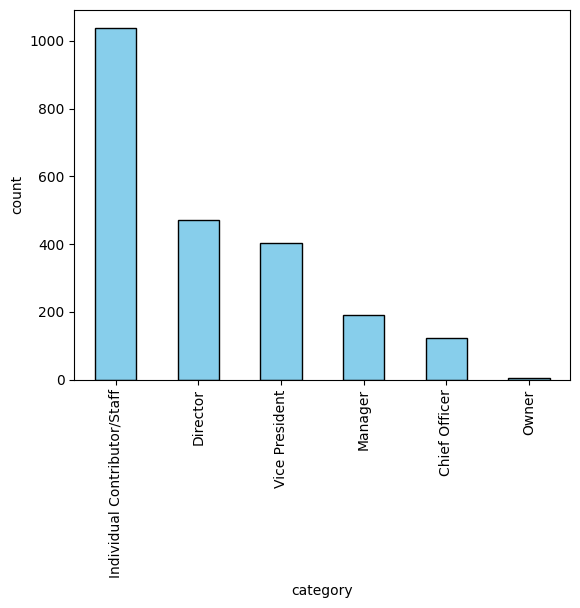

In [49]:
# plotting the number of elements in columns

data['Column 1'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
# data['Column 2'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
# data['Column 3'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
# data['Column 4'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("category")
plt.ylabel("count")
plt.show()

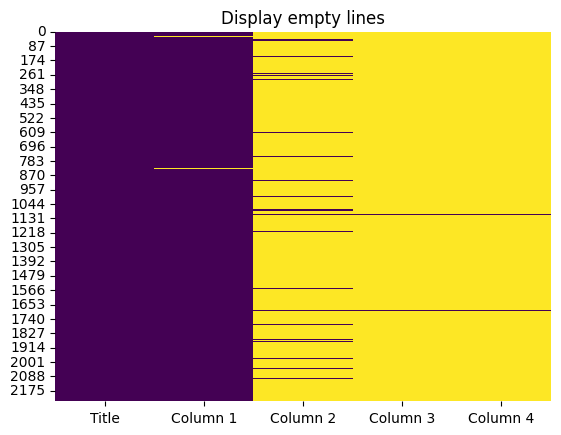

In [31]:
# empty values ​​in rows

data.isnull().sum()

import seaborn as sns
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Display empty lines")
plt.show()

In [32]:
# Counting frequencies for all labels
for column in ['Column 1', 'Column 2', 'Column 3', 'Column 4']:
    print(f"Распределение в {column}:")
    print(data[column].value_counts())
    print()

Распределение в Column 1:
Column 1
Individual Contributor/Staff    1039
Director                         470
Vice President                   403
Manager                          190
Chief Officer                    124
Owner                              4
Name: count, dtype: int64

Распределение в Column 2:
Column 2
Individual Contributor/Staff    55
Chief Officer                   42
Manager                         21
Director                        15
Name: count, dtype: int64

Распределение в Column 3:
Column 3
Individual Contributor/Staff    11
Director                         1
Name: count, dtype: int64

Распределение в Column 4:
Column 4
Director    11
Name: count, dtype: int64



In [35]:
# Normality test

from scipy.stats import shapiro

# Тест на нормальность
stat, p = shapiro(data['Column 1'])
# stat, p = shapiro(data['Column 2'])
# stat, p = shapiro(data['Column 3'])
# stat, p = shapiro(data['Column 4'])
if p > 0.05:
    print("Normality.")
else:
    print("Not normality.")

Данные НЕ распределены нормально.


In [ ]:
# Multi-Label Data
data['All_Labels'] = data[['Column 1', 'Column 2', 'Column 3', 'Column 4']].apply(lambda x: ', '.join(x.dropna()), axis=1)
label_counts = Counter(','.join(data['All_Labels']).split(','))
print(label_counts)

Counter({'Individual Contributor/Staff': 1039, 'Director': 470, 'Vice President': 403, 'Manager': 190, 'Chief Officer': 124, ' Individual Contributor/Staff': 66, ' Chief Officer': 42, ' Director': 27, ' Manager': 21, '': 10, 'Owner': 4})
